# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lat_lng_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lat_lng_list.append(lat_lng)

# Print the city count to confirm sufficient count
len(cities)

608

In [3]:
print(cities)

['sitka', 'tanshui', 'sao joao da barra', 'stoyba', 'gizo', 'taolanaro', 'vila franca do campo', 'butaritari', 'piacabucu', 'atuona', 'crib point', 'lincoln', 'tasiilaq', 'dingle', 'qaanaaq', 'punta arenas', 'clyde river', 'moindou', 'cherskiy', 'souillac', 'barrow', 'sao filipe', 'ribeira grande', 'tuktoyaktuk', 'beringovskiy', 'miles city', 'hermanus', 'barentsburg', 'albany', 'cape town', 'lebu', 'bluff', 'nikolskoye', 'pathein', 'vaini', 'murray bridge', 'luzilandia', 'luganville', 'cayenne', 'sayyan', 'port alfred', 'padang', 'ilulissat', 'busselton', 'rikitea', 'glen ellyn', 'kindu', 'kroya', 'vao', 'anapskaya', 'saskylakh', 'ushuaia', 'hanzhong', 'kavieng', 'amderma', 'quatre cocos', 'belushya guba', 'mataura', 'thompson', 'lawigan', 'ragandang', 'ende', 'kutum', 'pangnirtung', 'rumonge', 'codrington', 'grafton', 'sinnamary', 'kapaa', 'red wing', 'victoria', 'ambon', 'castro', 'albury', 'praia', 'puerto ayora', 'dikson', 'ancud', 'yurginskoye', 'talnakh', 'verkhovazhye', 'illoqq

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Create dataframe with list of cities
city_df = pd.DataFrame(cities)
city_df = city_df.rename(columns={0: 'city'})

#Add lat and lngs to dataframe, create separate columns for lats and longs
city_df['lat_lngs'] = lat_lng_list
city_df['lat'] = city_df.lat_lngs.map(lambda x: str(x[0]))
city_df['long'] = city_df.lat_lngs.map(lambda x: str(x[1]))

city_df.head()

,city,lat_lngs,lat,long
0,sitka,"(54.195017882651655, -140.9961652832942)",54.195017882651655,-140.9961652832942
1,tanshui,"(26.019526375955934, 121.05978225546767)",26.019526375955934,121.05978225546767
2,sao joao da barra,"(-32.56067629162232, -24.477583095776794)",-32.56067629162232,-24.477583095776794
3,stoyba,"(55.368221746300634, 131.32812960534739)",55.368221746300634,131.32812960534739
4,gizo,"(-10.657827351856753, 157.44736886399937)",-10.657827351856753,157.44736886399937


In [5]:
#Create new columns for data we'll be collecting from the API
city_df['temp'] = ""
city_df['max_temp'] = ""
city_df['humidity'] = ""
city_df['wind_speed'] = ""
city_df['clouds'] = ""

#Iterate over each row
for index, row in city_df.iterrows():
    city = row['city']
    print(f"Processing Record {index + 1} | {city}")
    city = city.replace(" ", "&")
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=" + city + "&APPID=" + weather_api_key
    print(url)
    weather = requests.get(url).json()
    try:
        city_df.loc[index, 'temp'] = weather['main']['temp']
        city_df.loc[index, 'max_temp'] = weather['main']['temp_max']
        city_df.loc[index, 'humidity'] = weather['main']['humidity']
        city_df.loc[index, 'wind_speed'] = weather['wind']['speed']
        city_df.loc[index, 'clouds'] = weather['clouds']['all']
    except:
        city_df.loc[index, 'temp'] = 'city not found'
        city_df.loc[index, 'humidity'] = 'city not found'
        city_df.loc[index, 'wind_speed'] = 'city not found'
        city_df.loc[index, 'clouds'] = 'city not found'
    time.sleep(.50)
    
print("----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Processing Record 1 | sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=sitka&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 2 | tanshui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=tanshui&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 3 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=sao&joao&da&barra&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 4 | stoyba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=stoyba&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 5 | gizo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=gizo&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 6 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=taolanaro&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 7 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=vila&franca&do&campo&APPID=cf45ad5d

Processing Record 58 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=mataura&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 59 | thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=thompson&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 60 | lawigan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=lawigan&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 61 | ragandang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ragandang&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 62 | ende
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ende&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 63 | kutum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=kutum&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 64 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=pangnirtung&APPID=cf45ad5d60076af179f9f3166bb272c9
Pr

Processing Record 115 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=cabo&san&lucas&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 116 | mozarlandia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=mozarlandia&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 117 | tsihombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=tsihombe&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 118 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=arraial&do&cabo&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 119 | izberbash
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=izberbash&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 120 | moiyabana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=moiyabana&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 121 | grand gaube
http://api.openweathermap.org/data/2.5/weather?units=Imper

Processing Record 171 | kovdor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=kovdor&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 172 | khovu-aksy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=khovu-aksy&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 173 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=vaitupu&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 174 | mercedes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=mercedes&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 175 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=sentyabrskiy&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 176 | klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=klaksvik&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 177 | saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=saint-pierre&APPID=cf45

Processing Record 228 | kamenskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=kamenskoye&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 229 | kyzyl-mazhalyk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=kyzyl-mazhalyk&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 230 | hamadan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=hamadan&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 231 | ascension
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ascension&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 232 | carupano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=carupano&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 233 | ormara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ormara&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 234 | tepechitlan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=tepechitlan&APPID=

Processing Record 285 | bonfim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=bonfim&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 286 | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=airai&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 287 | hovd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=hovd&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 288 | minot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=minot&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 289 | promissao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=promissao&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 290 | nhulunbuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=nhulunbuy&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 291 | ketchikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ketchikan&APPID=cf45ad5d60076af179f9f3166bb272c9
Pro

Processing Record 342 | hemnes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=hemnes&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 343 | ghorawal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ghorawal&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 344 | siyabuswa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=siyabuswa&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 345 | lubango
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=lubango&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 346 | camabatela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=camabatela&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 347 | dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=dunedin&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 348 | vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=vanimo&APPID=cf45ad5d60076af179f9f316

Processing Record 399 | rameswaram
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=rameswaram&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 400 | bawku
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=bawku&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 401 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=chokurdakh&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 402 | rodrigues alves
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=rodrigues&alves&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 403 | sapul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=sapul&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 404 | bentonville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=bentonville&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 405 | cap malheureux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=cap&malheur

Processing Record 456 | suntar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=suntar&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 457 | narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=narsaq&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 458 | yenagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=yenagoa&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 459 | safaqis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=safaqis&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 460 | kuche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=kuche&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 461 | bonnyville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=bonnyville&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 462 | shevchenkove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=shevchenkove&APPID=cf45ad5d60076af179f9f316

Processing Record 513 | atherton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=atherton&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 514 | grand river south east
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=grand&river&south&east&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 515 | shenzhen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=shenzhen&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 516 | varkaus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=varkaus&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 517 | vila do maio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=vila&do&maio&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 518 | januaria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=januaria&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 519 | birjand
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=

Processing Record 569 | panorama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=panorama&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 570 | zimapan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=zimapan&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 571 | bossembele
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=bossembele&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 572 | taltal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=taltal&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 573 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=srednekolymsk&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 574 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=saint-augustin&APPID=cf45ad5d60076af179f9f3166bb272c9
Processing Record 575 | salinopolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=salinopoli

In [6]:
#Remove any cities that could not be found from the dataframe
city_df = city_df[city_df.temp != 'city not found']

#Check that there are still 500+ records
len(city_df)

553

In [7]:
#Convert lat from string to float object
city_df.lat = city_df.lat.astype(float)
city_df.head()

,city,lat_lngs,lat,long,temp,max_temp,humidity,wind_speed,clouds
0,sitka,"(54.195017882651655, -140.9961652832942)",54.195018,-140.9961652832942,68,68,64,4.7,1
2,sao joao da barra,"(-32.56067629162232, -24.477583095776794)",-32.560676,-24.477583095776794,74.8,74.8,92,5.79,100
4,gizo,"(-10.657827351856753, 157.44736886399937)",-10.657827,157.44736886399937,84,84,75,12.03,7
6,vila franca do campo,"(37.0216709273888, -21.829063954293986)",37.021671,-21.829063954293986,70,70,72,1.01,0
7,butaritari,"(21.46527150153588, 163.18601932759464)",21.465272,163.18601932759464,82.94,82.94,73,16.26,0


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_df.to_csv(output_data_file, encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

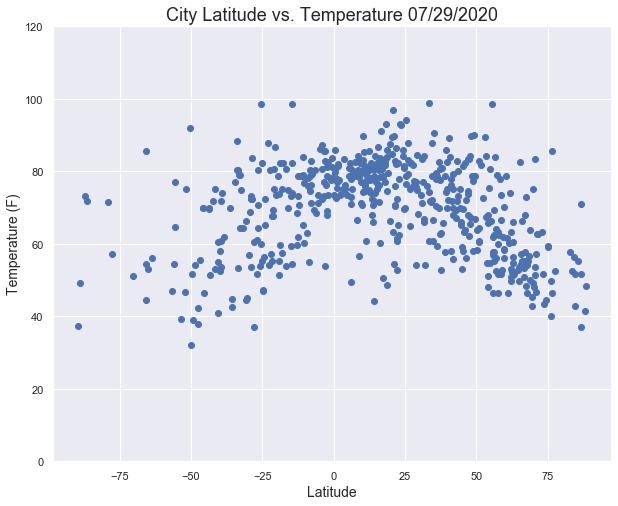

In [13]:
#Pull in today's date for graphs
import datetime
date = datetime.date.today()
date = time.strftime("%m/%d/%Y")

import seaborn as sns
sns.set()
plt.figure(figsize=(10,8))
plt.scatter(city_df['lat'], city_df['temp'])
plt.title(f"City Latitude vs. Temperature {date}", fontsize="18")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Temperature (F)", fontsize="14")
plt.ylim(0, 120)

plt.savefig("Temperature.png")

plt.show()

#### Latitude vs. Humidity Plot

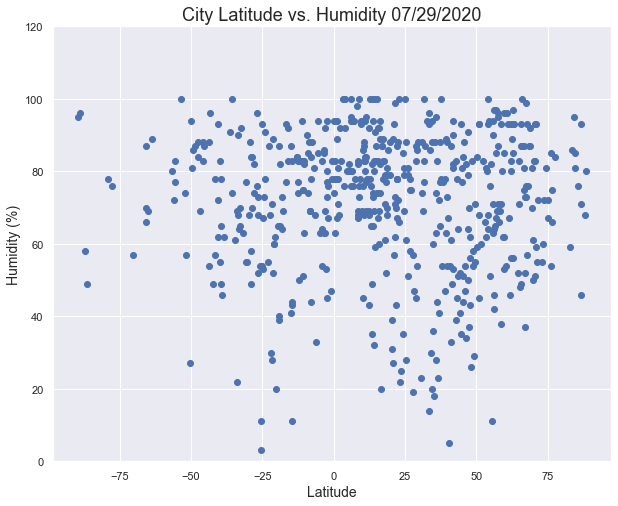

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(city_df['lat'], city_df['humidity'])                              
plt.title(f"City Latitude vs. Humidity {date}", fontsize="18")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Humidity (%)", fontsize="14")

plt.ylim(0,120)

plt.savefig("../Images/Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

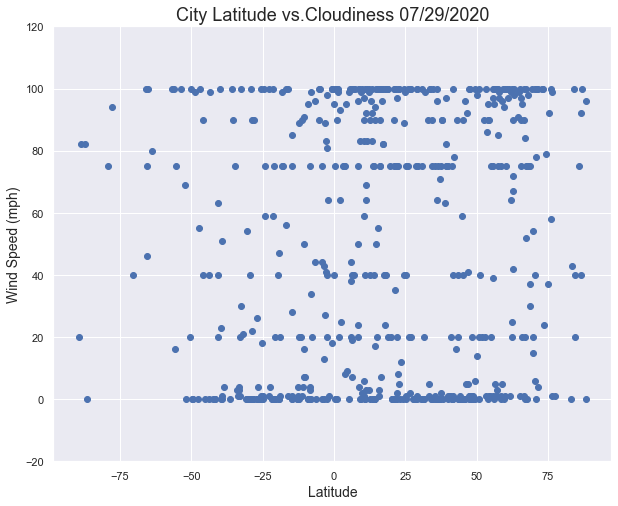

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(city_df['lat'], city_df['clouds'])                              
plt.title(f"City Latitude vs.Cloudiness {date}", fontsize="18")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Wind Speed (mph)", fontsize="14")
plt.ylim(-20, 120)

plt.savefig("Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

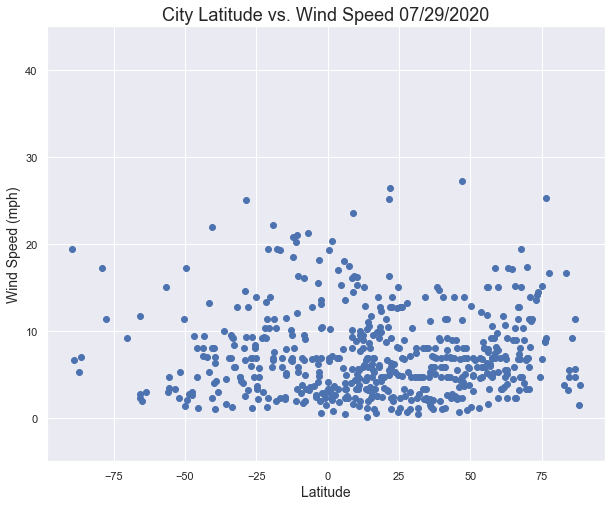

In [20]:
plt.figure(figsize=(10,8))
plt.scatter(city_df['lat'], city_df['wind_speed'])                              
plt.title(f"City Latitude vs. Wind Speed {date}", fontsize="18")
plt.xlabel("Latitude", fontsize="14")
plt.ylabel("Wind Speed (mph)", fontsize="14")

plt.ylim(-5,45)

plt.savefig("Wind_Speed.png")

plt.show()

In [ ]:
# Observable trends:

# From this dataset you can see that as we might expect, the temperature is higher at Latitude 0 (Equator) today and descreases as the latitude moves further from the Equator.
# You can also see that cloudiness and humidity don't seem to be dependent on latitude, but is fairly evenly disbursed.
# Finally, wind speed also doesn't seem to be related to latitude as windspeed for this dataset is clustered around 0.